# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./Dataset/dataset.csv",encoding = "ISO-8859-1")

In [3]:
df = data.copy()
pd.set_option("display.max_column",111)

In [4]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
missing_rate = df.isna().sum()/df.shape[0]

In [6]:
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

In [7]:
blood_columns = list(df.columns[(missing_rate<0.9) & (missing_rate > 0.88)])

In [8]:
viral_columns = list(df.columns[(missing_rate<0.80)&(missing_rate>0.75)])

In [9]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [10]:
df = df[key_columns+blood_columns +viral_columns]

In [11]:
df.shape

(5644, 33)

## Train test encodage

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainset, testset = train_test_split(df,test_size=0.2,random_state=0)

In [14]:
trainset["SARS-Cov-2 exam result"].value_counts(normalize = True)

SARS-Cov-2 exam result
negative    0.900997
positive    0.099003
Name: proportion, dtype: float64

In [15]:
testset["SARS-Cov-2 exam result"].value_counts(normalize = True)

SARS-Cov-2 exam result
negative    0.901683
positive    0.098317
Name: proportion, dtype: float64

### Encodage

In [16]:
def encodage(df):
    code = {
        "positive":1,
        "negative":0,
        "detected":1, 
        "not_detected":0
    }
    for col in df.select_dtypes("object"):
        df[col] = df[col].map(code)
    return df

In [17]:
def feature_eng(df):
    df["est malade"] = df[viral_columns].sum(axis=1) >=1
    df = df.drop(viral_columns,axis=1)
    return df

In [18]:
def imputation(df):
    return df.dropna(axis=0)

In [19]:
def imputation1(df):
    return df.fillna(-999)

In [20]:
def preprocessing(df):
    df = encodage(df)
    df = feature_eng(df)
    df = imputation(df)
    X = df.drop("SARS-Cov-2 exam result",axis=1)
    y = df["SARS-Cov-2 exam result"]
    print(f"le nombre de positive est negative dans targt est: {y.value_counts()}")
    return X,y

In [21]:
X_train, y_train = preprocessing(trainset)

le nombre de positive est negative dans targt est: SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [22]:
X_test, y_test = preprocessing(testset)

le nombre de positive est negative dans targt est: SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


In [23]:
testset = pd.concat([X_test, y_test], axis=1)
# print(f"-----{testset.shape[1]}")
# print(testset["SARS-Cov-2 exam result"].head(3))
y_1 = testset[testset['SARS-Cov-2 exam result'] == 1].head(3)
y_0 = testset[testset['SARS-Cov-2 exam result'] == 0].head(1)
selected_indices = y_1.index.union(y_0.index)
X_selected = X_test.loc[selected_indices]
y_selected = y_test.loc[selected_indices]
testset = testset.drop(index=selected_indices,axis = 0)

In [24]:
testset.shape[0] 

107

In [25]:
y_test = testset["SARS-Cov-2 exam result"]

In [26]:
X_test = testset.drop("SARS-Cov-2 exam result",axis=1)

## modelisation

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [29]:
preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

In [30]:
random_forest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
decision_tree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))
xgboost = make_pipeline(preprocessor,XGBClassifier(random_state=0))
logistic_regression = make_pipeline(preprocessor,StandardScaler(),LogisticRegression(max_iter=5000,random_state=0))
knn = make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())
svm = make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))

In [31]:
list_of_models = {
    "random forest":random_forest,
    "desicion tree":decision_tree,
    "xgboost":xgboost,
    "logistic regression":logistic_regression,
    "knn":knn,
    "svm":svm
}

### Procedure d'evaluation

In [32]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [33]:
def evaluation_model(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    N,train_score,val_score = learning_curve(model, X_train, y_train, cv=4,scoring = "f1",train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label="train score")
    plt.plot(N,val_score.mean(axis=1),label="validation score")
    plt.legend()

random forest
[[90  4]
 [ 9  4]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        94
           1       0.50      0.31      0.38        13

    accuracy                           0.88       107
   macro avg       0.70      0.63      0.66       107
weighted avg       0.86      0.88      0.87       107

desicion tree
[[85  9]
 [ 9  4]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        94
           1       0.31      0.31      0.31        13

    accuracy                           0.83       107
   macro avg       0.61      0.61      0.61       107
weighted avg       0.83      0.83      0.83       107

xgboost
[[90  4]
 [ 7  6]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        94
           1       0.60      0.46      0.52        13

    accuracy                           0.90       107
   macro avg       0.76      0.71  

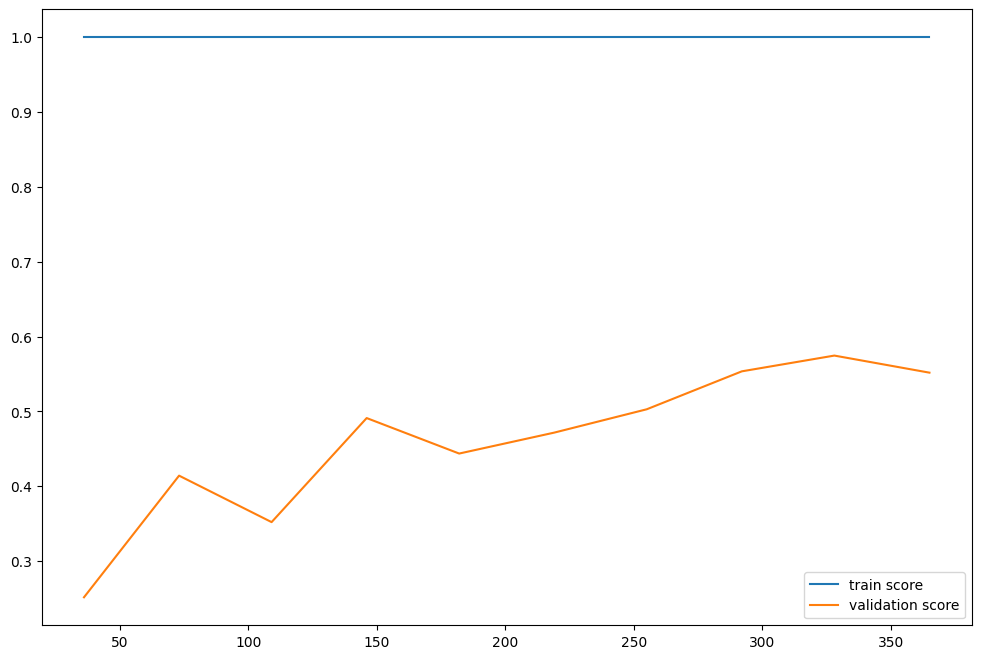

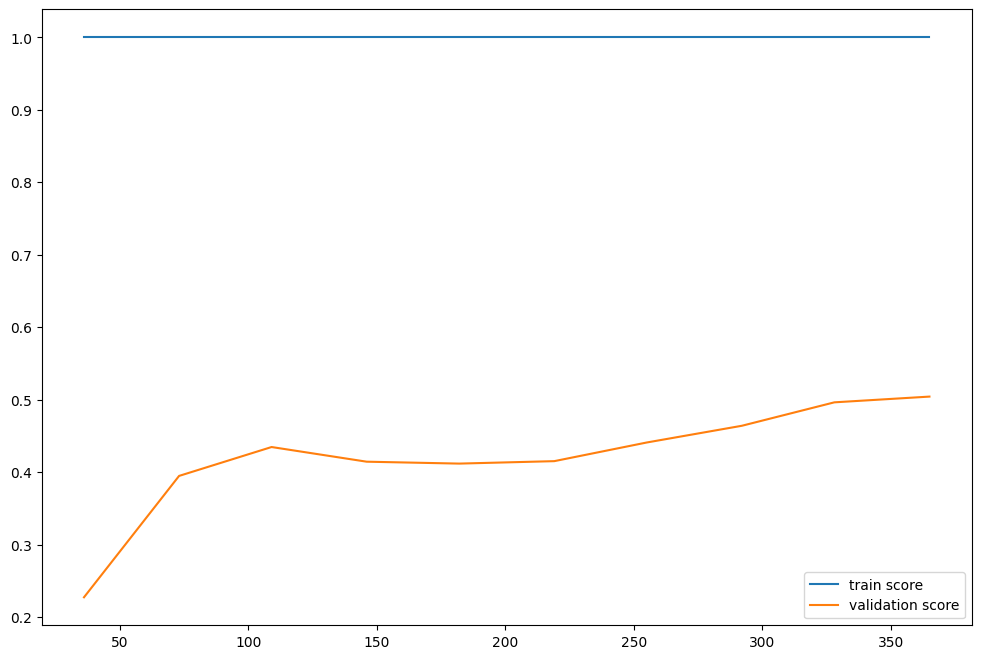

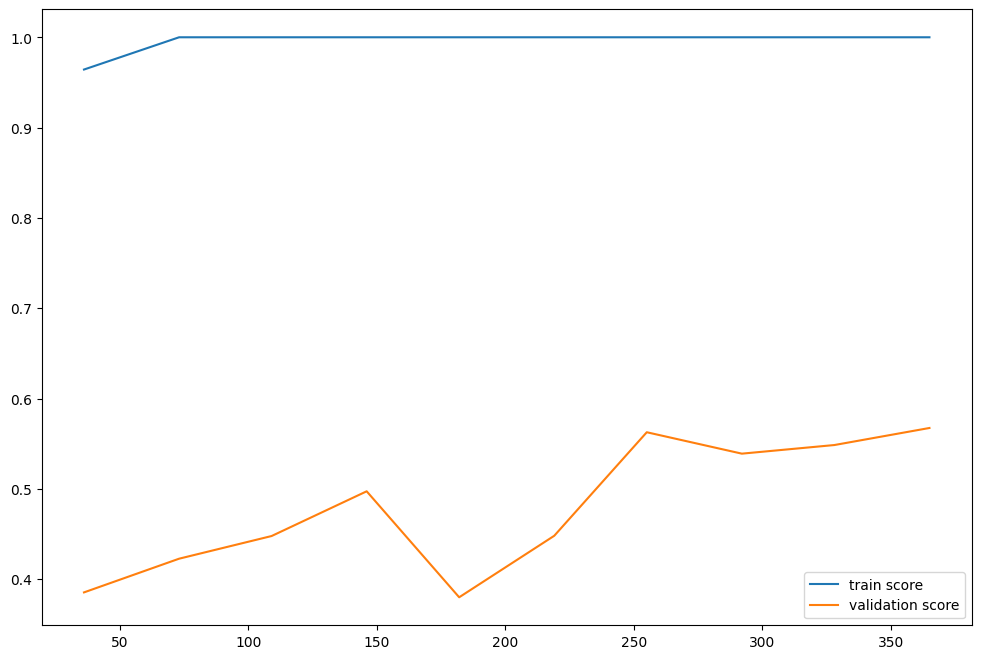

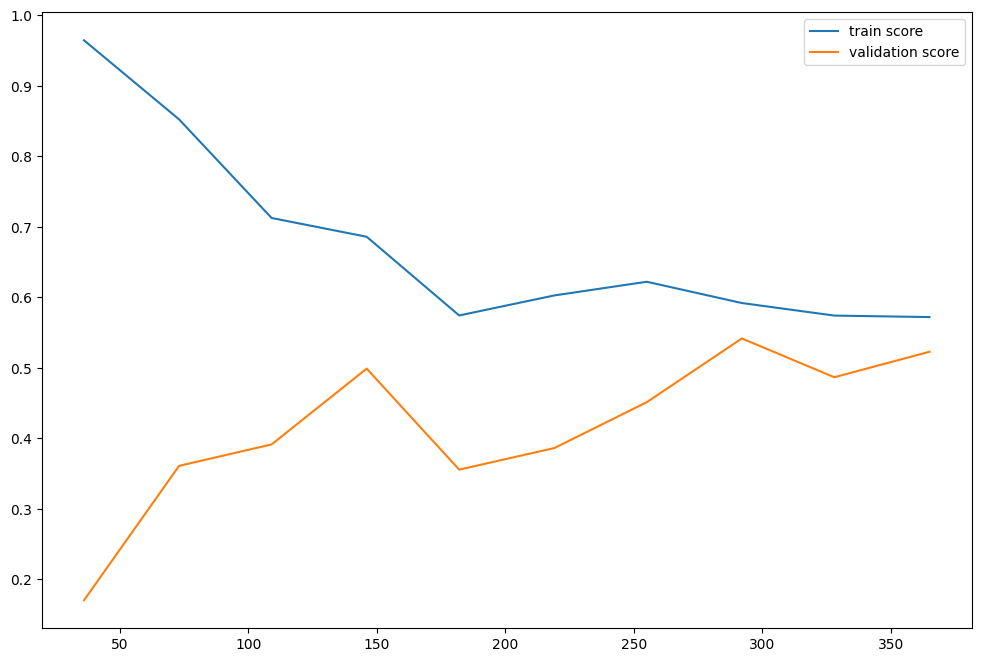

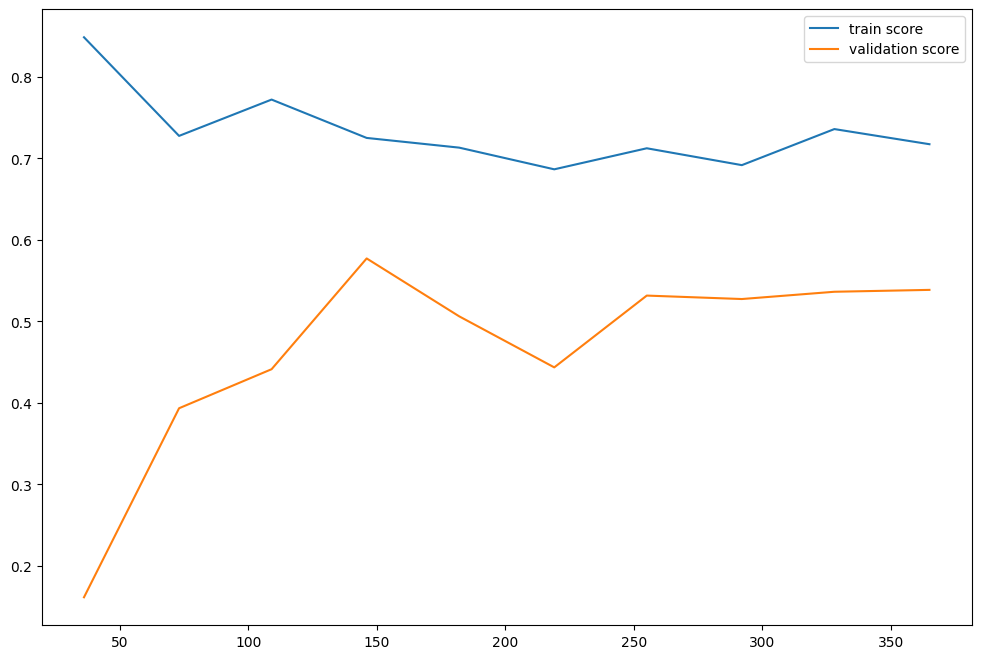

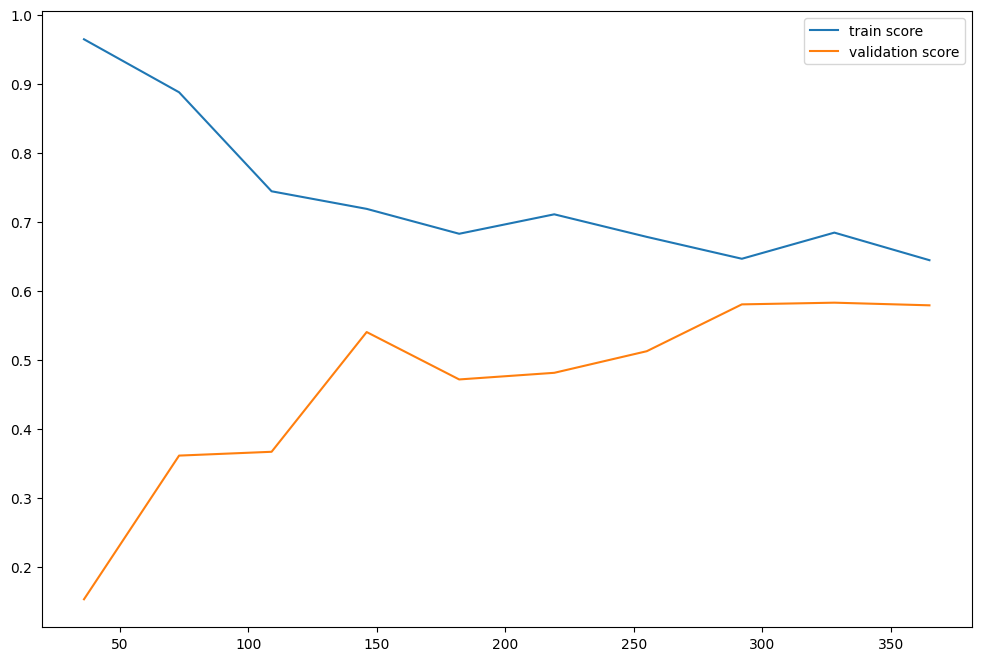

In [34]:
for name,model in list_of_models.items():
    print(name)
    evaluation_model(model)

In [30]:
# en remaque que les algorithmes: logistic regression, svm et knn ne donne de bonne resultats 
# par rapport a l'ouverfitting, donc on va concentrer seulement sure logistic regression et svm
# balak f lkhr xgboost

### optimisation svm

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
svm

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [37]:
hyper_params = {
    "svc__gamma":[0.1, 0.01, 0.001, 0.0001],
    "svc__C" : [10,100,1000],
    "pipeline__polynomialfeatures__degree":[2,3,4,5],
    "pipeline__selectkbest__k": range(50,100)

}

In [38]:
grid = RandomizedSearchCV(svm, hyper_params, scoring="recall", cv=4,n_iter=20)

In [39]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('svc', SVC(random_state=0))]),
                   n_iter=20,
                   param_distributions={'pipeline__polynomialfeatures__degree': [2,
                                                                                 3,
                                                                                 4,
                                                                                 5],
                                        'pipeline__selectkbest__k': range(50, 100),
                                        'svc__C': [10, 100, 1000],
                                        'svc__gamma': [0.1, 0.01, 0.001,
                                                       0.0001]},
                   scoring='recall')

In [40]:
print(grid.best_params_)

{'svc__gamma': 0.01, 'svc__C': 100, 'pipeline__selectkbest__k': 59, 'pipeline__polynomialfeatures__degree': 5}


In [ ]:
# {'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 59, 'pipeline__polynomialfeatures__degree': 3

In [41]:
y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        94
           1       0.50      0.46      0.48        13

    accuracy                           0.88       107
   macro avg       0.71      0.70      0.71       107
weighted avg       0.87      0.88      0.88       107



[[88  6]
 [ 7  6]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        94
           1       0.50      0.46      0.48        13

    accuracy                           0.88       107
   macro avg       0.71      0.70      0.71       107
weighted avg       0.87      0.88      0.88       107



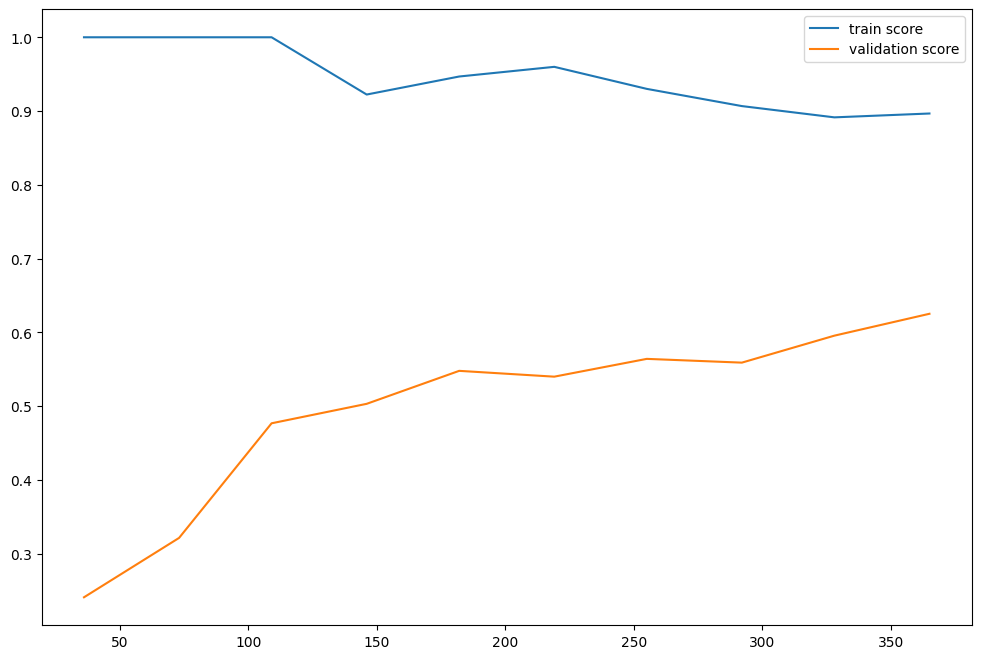

In [42]:
evaluation_model(grid.best_estimator_)

In [139]:
# il ya une grande amelioration et mm le score au niveau de validation et trains prsq l meme donc
# cest bien le modele est capable de generaliser bon signe

## maintenant on va creer un treshold avec les graphes de recall et precision

### precisoin recall curve

In [43]:
from sklearn.metrics import precision_recall_curve

In [44]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

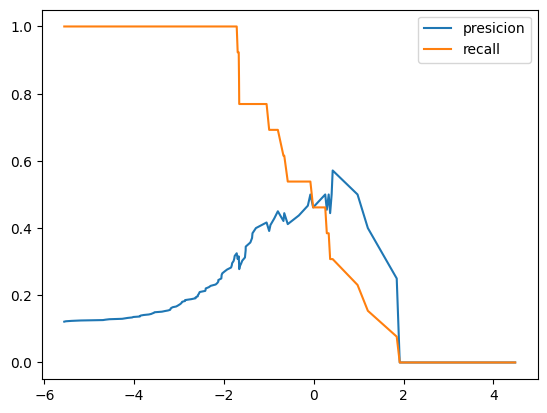

In [45]:
plt.plot(threshold, precision[:-1],label="presicion")
plt.plot(threshold, recall[:-1],label="recall")
plt.legend()

In [46]:
                                                    
def final_model(model, x,threshold=0):
    return model.decision_function(x)>threshold


In [52]:
from sklearn.metrics import recall_score

y_pred = final_model(grid.best_estimator_, X_test, -1.1)
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.5405405405405406
0.7692307692307693


In [95]:
# finalement on trouve notre objectif qui est 0.54 scoref1 et 0.77 recall, threshold -1.1

# test model final

In [53]:
y_pred_final = final_model(grid.best_estimator_, X_selected, -1.1)

In [55]:
y_selected # [false, True, True, True]

895     0
4924    1
5169    1
5201    1
Name: SARS-Cov-2 exam result, dtype: int64

In [54]:
y_pred_final

array([False,  True, False,  True])

### optimisation logistic regression

In [96]:
logistic_regression

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

In [256]:
hyper_params = {
    "logisticregression__solver":['liblinear','saga'],
    "logisticregression__penalty":["l1","l2","elasticnet"],
    "logisticregression__C":range(1,5),
    "pipeline__polynomialfeatures__degree":[3,4],
    "pipeline__selectkbest__k": range(10,100)
}

In [257]:
grid = RandomizedSearchCV(logistic_regression, hyper_params, scoring="recall", cv=4,n_iter=40)

In [258]:
grid.fit(X_train,y_train)

c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\raid_ben\AppData\L

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=5000,
                                                                 random_state=0))]),
                   n_iter=40,
                   param_distributions={'logisticregression__C': range(1, 5),
                                        'logisticregression__penalty': ['l1',
                                                                        'l2',
                                                                        'elasticnet'],
                                        'logisticregression__solver': ['liblinear',
                                                                       'saga'],
                                        'pipeline__polynomialfeatures__degree': [3,
                                                                                 4],
                                        'pipeline__selectkbest__k': range(10, 100)},
                   scoring='recall')

In [259]:
print(grid.best_params_)

{'pipeline__selectkbest__k': 56, 'pipeline__polynomialfeatures__degree': 3, 'logisticregression__solver': 'saga', 'logisticregression__penalty': 'l2', 'logisticregression__C': 2}


In [260]:
y_pred = grid.best_estimator_.predict(X_test)

[[89  6]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.54      0.44      0.48        16

    accuracy                           0.86       111
   macro avg       0.72      0.69      0.70       111
weighted avg       0.85      0.86      0.86       111



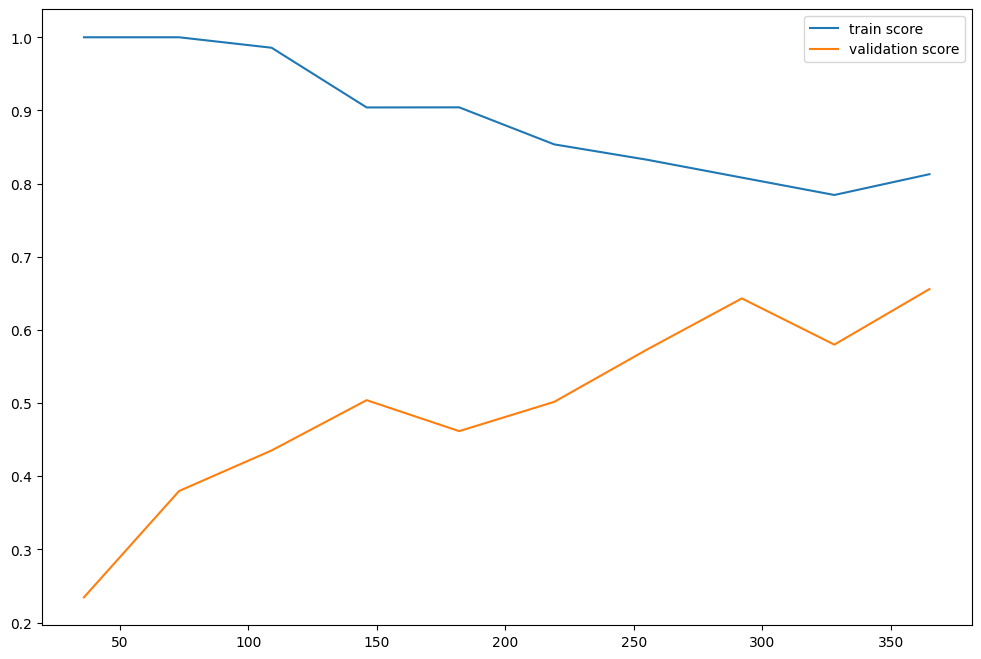

In [261]:
evaluation_model(grid.best_estimator_)

In [ ]:
# avec ces parametres la logistic regression peut 
# faire haja recall 0.56 bien

### precision recall curve

In [262]:
precision, recall, threshold = precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

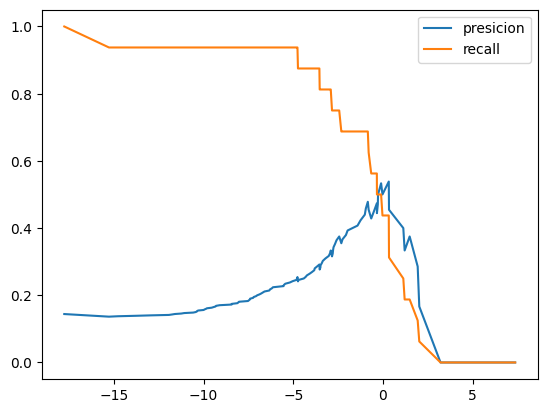

In [263]:
plt.plot(threshold, precision[:-1],label="presicion")
plt.plot(threshold, recall[:-1],label="recall")
plt.legend()

In [266]:
y_pred = final_model(grid.best_estimator_, X_test, -2)
print(f"f1_score = {f1_score(y_test,y_pred)}")
print(f"recall = {recall_score(y_test,y_pred)}")

f1_score = 0.5
recall = 0.6875


In [ ]:
### logistic regreession nous donne 0.5 f1score et 0.6875 recall

### KNN optemisation

In [267]:
knn

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [290]:
hyper_params = {
    "kneighborsclassifier__n_neighbors":[9,11,13],
    "kneighborsclassifier__weights":['uniform', 'distance'],
}

In [291]:
grid = RandomizedSearchCV(knn, hyper_params, scoring="recall", cv=4,n_iter=6)

In [292]:
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=6,
                   param_distributions={'kneighborsclassifier__n_neighbors': [9,
                                                                              11,
                                                                              13],
                                        'kneighborsclassifier__weights': ['uniform',
                                                                          'distance']},
                   scoring='recall')

In [293]:
print(grid.best_params_)

{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 9}


[[92  3]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.70      0.44      0.54        16

    accuracy                           0.89       111
   macro avg       0.81      0.70      0.74       111
weighted avg       0.88      0.89      0.88       111



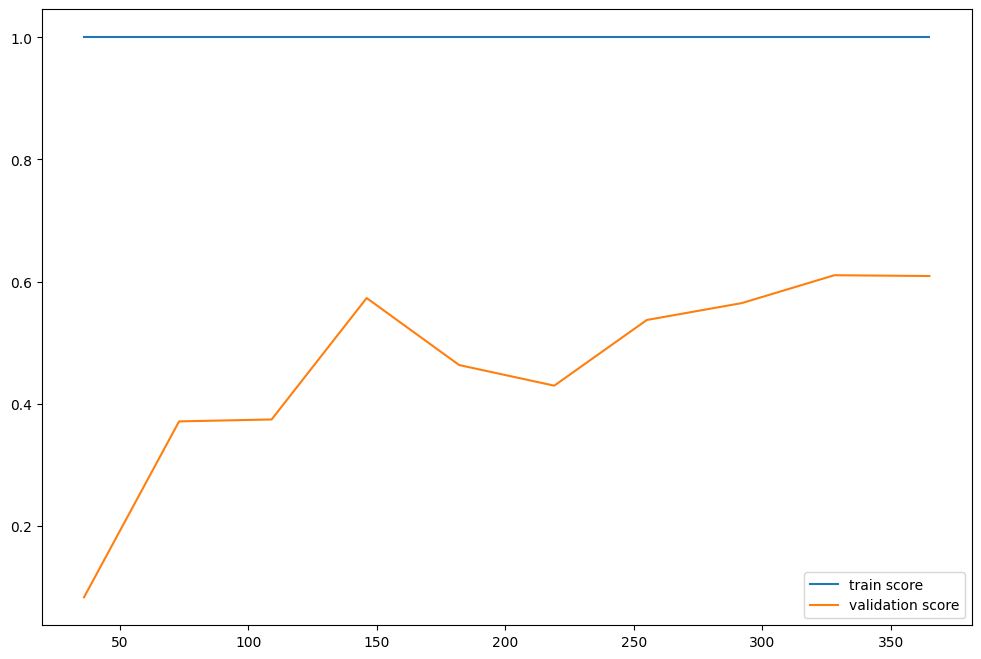

In [294]:
y_pred = grid.best_estimator_.predict(X_test)
evaluation_model(grid.best_estimator_)

### precision recall curve

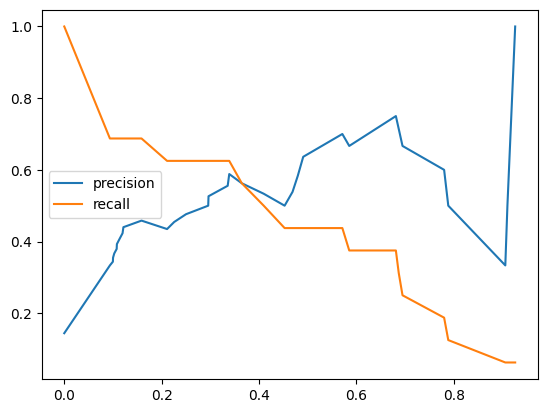

In [304]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])
plt.plot(threshold, precision[:-1], label="precision")
plt.plot(threshold, recall[:-1], label="recall")
plt.legend()


In [298]:
def final_model(model, x, threshold=0):
    if hasattr(model, 'predict_proba'):
        return model.predict_proba(x)[:, 1] > threshold
    elif hasattr(model, 'decision_function'):
        return model.decision_function(x) > threshold
    else:
        raise AttributeError("The provided model does not have a decision function or predict_proba method.")


In [326]:
y_pred = final_model(grid.best_estimator_, X_test, 0.15)
print(f"f1_score = {f1_score(y_test,y_pred)}")
print(f"recall = {recall_score(y_test,y_pred)}")

f1_score = 0.55
recall = 0.6875


In [327]:
### knn nous donne o.55 f1score et 0.6875 recall presque comme logistic regression

### maintenant pour XGboost

In [328]:
xgboost

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [382]:
hyper_params = {    
    'xgbclassifier__n_estimators': [100, 200, 500],
    'xgbclassifier__reg_alpha': [0, 0.1, 0.5],  # Ajout de 0 pour moins de régularisation
    'xgbclassifier__reg_lambda': [0, 0.1, 0.5], # Ajout de 0 pour moins de régularisation
    'xgbclassifier__base_score': [0.2, 0.5, 1],
    "xgbclassifier__max_depth" : [3,6,9]
}

In [383]:
grid = RandomizedSearchCV(xgboost, hyper_params, scoring="recall", cv=4,n_iter=50)

In [384]:
grid.fit(X_train,y_train)

c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
76 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\raid_ben\AppData\Local\Programs\Python\Python39\lib\site

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('polynomialfeatures',
                                                               PolynomialFeatures(include_bias=False)),
                                                              ('selectkbest',
                                                               SelectKBest())])),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=N...
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=0, ...))]),
                   n_iter=50,
                   param_distributions={'xgbclassifier__base_score': [0.2, 0.5,
                                                                      1],
                                        'xgbclassifier__max_depth': [3, 6, 9],
                                        'xgbclassifier__n_estimators': [100,
                                                                        200,
                                                                        500],
                                        'xgbclassifier__reg_alpha': [0, 0.1,
                                                                     0.5],
                                        'xgbclassifier__reg_lambda': [0, 0.1,
                                                                      0.5]},
                   scoring='recall')

In [385]:
print(grid.best_params_)

{'xgbclassifier__reg_lambda': 0.5, 'xgbclassifier__reg_alpha': 0.5, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__base_score': 0.2}


[[90  5]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        95
           1       0.50      0.31      0.38        16

    accuracy                           0.86       111
   macro avg       0.70      0.63      0.65       111
weighted avg       0.83      0.86      0.84       111



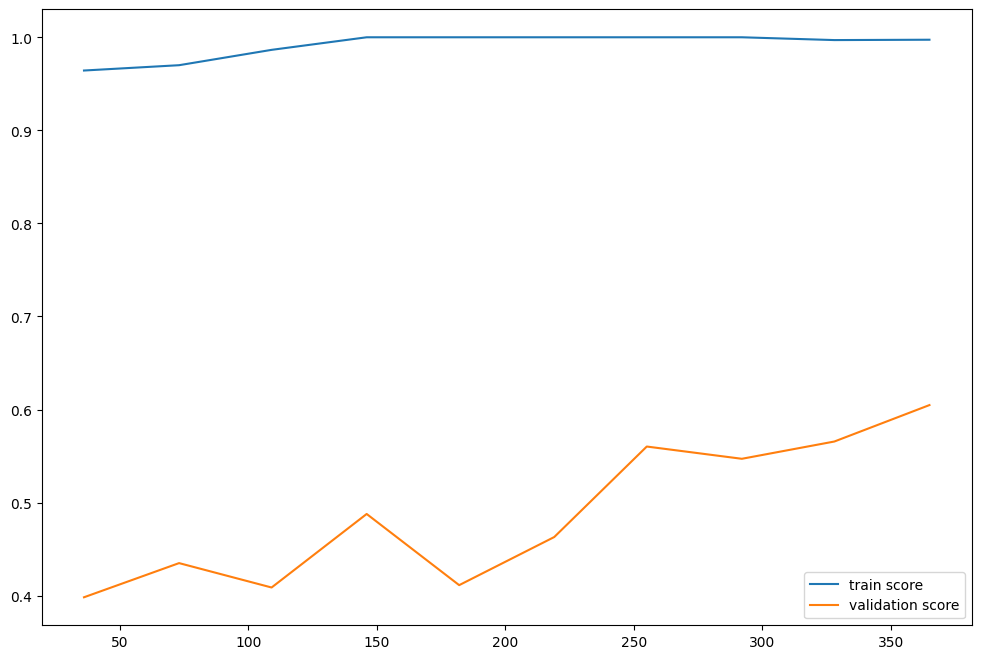

In [386]:
y_pred = grid.predict(X_test)
evaluation_model(grid.best_estimator_)

### precision and recall curve

In [387]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1])

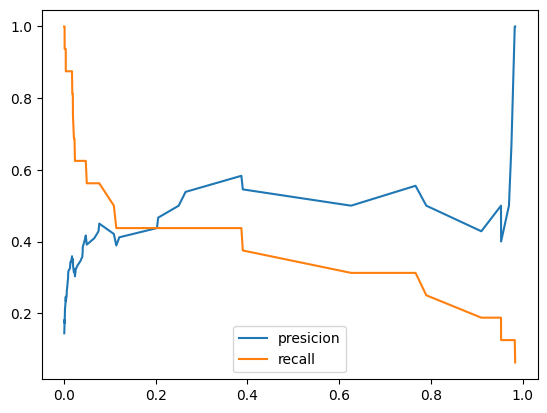

In [388]:
plt.plot(threshold, precision[:-1],label="presicion")
plt.plot(threshold, recall[:-1],label="recall")
plt.legend()

In [389]:
y_pred = final_model(grid.best_estimator_, X_test, 0.2)
print(f"f1_score = {f1_score(y_test,y_pred)}")
print(f"recall = {recall_score(y_test,y_pred)}")

f1_score = 0.4375
recall = 0.4375


In [390]:
# cela juste pour vous dire simplement et clasirement que les model base sur les arbres ne nous donne
# pas des bonnes resultats car deja det le debut ona a pas un elarge dataset
# donc on va soufrir de ouverfittin
# on remqrue que le support vector machine est le meilleur dans ce cas 
# il ne donne des bonnes resultatas dans ce genre de df.shape[0]